In [16]:
import herbie
import xarray as xr
import metpy
import fsspec
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import zarr
import pygrib
import os

from scipy.spatial import KDTree

In [6]:
derecho_list = ["20090618", "20100601", "20100718", "20110711", "20130624",
                "20140630", "20140701", "20180628", "20200810", "20211215",
                "20220705", "20230629", "20240524", "20240715"]
date = "20240524"

In [7]:
lat_lons = {'KARX': (43.820833, -91.191111),
            'KOAX': (41.320369, -96.366819),
            'KDVN': (41.611667, -90.580833),
            'KDMX': (41.731, 93.723),
            'KFSD': (43.587778, 96.729444)}

In [14]:
for i in range(24):
    H = herbie.Herbie(f"2018-06-28T{i:02d}:00:00", model="hrrr",
                      product="sfc", fxx=0, save_dir='/lcrc/group/earthscience/rjackson/Earnest/hrrr')
    H.download()

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 00:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 01:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 02:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 03:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 04:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 05:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws


🦨 GRIB2 file not found: self.model='hrrr' self.date=Timestamp('2018-06-28 06:00:00') self.fxx=0


💔 Did not find ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 06:00 UTC F00
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 07:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 08:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 09:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 10:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 11:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 12:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 13:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 14:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 15:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 16:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr

🦨 GRIB2 file not found: self.model='hrrr' self.date=Timestamp('2018-06-28 19:00:00') self.fxx=0


💔 Did not find ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 19:00 UTC F00
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 20:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 21:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 22:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2018-Jun-28 23:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws


RAP Historical data extraction.

CAPE, CIN, 850 hPa wind, 

In [ ]:
ds_height = xr.open_dataset(file_path, engine="cfgrib",
                            filter_by_keys={'typeOfLevel': 'isobaricInhPa'})
ds_height

skipping variable: paramId==3041 shortName='p3041'
Traceback (most recent call last):
  File "/gpfs/fs1/home/rjackson/mambaforge/envs/pydda_env/lib/python3.11/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/gpfs/fs1/home/rjackson/mambaforge/envs/pydda_env/lib/python3.11/site-packages/cfgrib/dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  875.,  850.,  825.,  800.,
        775.,  750.,  725.,  700.,  675.,  650.,  625.,  600.,  575.,
        550.,  525.,  500.,  475.,  450.,  425.,  400.,  375.,  350.,
        325.,  300.,  275.,  250.,  225.,  200.,  175.,  150.,  125.,
        100.])) new_value=Variable(dimensions=(), data=500.0)


<xarray.Dataset>
Dimensions:        (isobaricInhPa: 37, y: 225, x: 301)
Coordinates:
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 975.0 950.0 ... 125.0 100.0
    latitude       (y, x) float64 ...
    longitude      (y, x) float64 ...
    valid_time     datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    gh             (isobaricInhPa, y, x) float32 ...
    t              (isobaricInhPa, y, x) float32 ...
    r              (isobaricInhPa, y, x) float32 ...
    u              (isobaricInhPa, y, x) float32 ...
    v              (isobaricInhPa, y, x) float32 ...
    w              (isobaricInhPa, y, x) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-04-08T14:30 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
ds_height["unknown"]

<xarray.DataArray 'unknown' (y: 225, x: 301)>
[67725 values with dtype=float32]
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    valid_time  datetime64[ns] ...
Dimensions without coordinates: y, x
Attributes: (12/32)
    GRIB_paramId:                             0
    GRIB_numberOfPoints:                      67725
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            lambert
    ...                                       ...
    GRIB_name:                                unknown
    GRIB_shortName:                           unknown
    GRIB_units:                               unknown
    long_name:                                unknown
    units:                                    unknown
    standard_name:                            unknown

In [13]:
model = "rap_historical"
date = "20100718"
grbs = pygrib.open(f'/lcrc/group/earthscience/rjackson/Earnest/hrrr/{model}/{date}/ruc2anl_130_{date}_{i:02d}00_000.grb2')
grb = grbs.select(name="Convective available potential energy")
grb[0].values

array([[   0.,    0.,    0., ..., 1492., 1393., 1295.],
       [   0.,    0.,    0., ..., 1337., 1266., 1191.],
       [   0.,    0.,    0., ..., 1242., 1173., 1118.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

In [ ]:
model = "hrrr"
date = "20180628"
dses = {}
ds_pres = []
ds_surf = []
for i in range(24):
    if model == "rap_historical":
        file_path = f'/lcrc/group/earthscience/rjackson/Earnest/hrrr/{model}/{date}/ruc2anl_130_{date}_{i:02d}00_000.grb2'
        ds_pres.append(xr.open_dataset(file_path, engine="cfgrib", filter_by_keys={'typeOfLevel': 'isobaricInhPa'}))
        ds_surf.append(xr.open_dataset(file_path, engine="cfgrib", filter_by_keys={'typeOfLevel': 'surface'}))
    elif model == "hrrr":
        file_path_prs = f'/lcrc/group/earthscience/rjackson/Earnest/hrrr/{model}/{date}/hrrr.t{i:02d}z.wrfprsf00.grib2'
        file_path_surf = f'/lcrc/group/earthscience/rjackson/Earnest/hrrr/{model}/{date}/hrrr.t{i:02d}z.wrfsfcf00.grib2'
        if os.path.exists(file_path_prs) and os.path.exists(file_path_surf):
            ds = xr.open_dataset(file_path_prs, engine="cfgrib", filter_by_keys={
                'typeOfLevel': 'isobaricInhPa', "level": 850})
            ds = ds[["u", "v", "time"]]
            ds_pres.append(ds)
            ds = xr.open_dataset(file_path_surf, engine="cfgrib", 
                                 filter_by_keys={'stepType': 'instant', "shortName": "cape", 'typeOfLevel': 'surface'})
            ds = ds[["cape", "time"]]
            ds_surf.append(ds)
        print(i)
ds_pres = xr.concat(ds_pres, dim='time')
ds_surf = xr.concat(ds_surf, dim='time')

0
1


KeyboardInterrupt: 

In [20]:
#ds_pres = xr.concat(ds_pres, dim='time')
ds_surf[0]

<xarray.Dataset>
Dimensions:     (y: 1059, x: 1799)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    valid_time  datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables: (12/32)
    vis         (y, x) float32 ...
    gust        (y, x) float32 ...
    sp          (y, x) float32 ...
    orog        (y, x) float32 ...
    t           (y, x) float32 ...
    cnwat       (y, x) float32 ...
    ...          ...
    ulwrf       (y, x) float32 ...
    vbdsf       (y, x) float32 ...
    vddsf       (y, x) float32 ...
    blh         (y, x) float32 ...
    lsm         (y, x) float32 ...
    siconc      (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-04-09T13:21 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
tree = KDTree(np.c_[ds_pres["latitude"].values.ravel(), ds_pres["longitude"].values.ravel()])
u850 = ds_pres["u"].sel(isobaricInhPa=850., method='nearest')
v850 = ds_pres["v"].sel(isobaricInhPa=850., method='nearest')
spd850 = np.sqrt(u850**2 + v850**2)
if model == "rap_historical":
    cape = ds_surf["unknown"]
    thetae = ds_surf["p3014"]
elif model == "hrrr":
    cape = ds_surf["cape"]
datasets = {}
for k in lat_lons.keys():
    datasets[k] = {}
    index = tree.query((lat_lons[k][0], lat_lons[k][1]))[0]
    shape = (u850.shape[0], u850.shape[1]*u850.shape[2])
    datasets[k]['u850'] = u850.reshape(shape)[:, index]
    datasets[k]['v850'] = v850.reshape(shape)[:, index]
    datasets[k]['spd850'] = spd850.reshape(shape)[:, index]
    datasets[k]['cape'] = cape.reshape(shape)[:, index]
    datasets[k]['time'] = ds_pres["time"]
    datasets[k] = xr.Dataset(datasets[k])
    datasets[k].to_netcdf(f"{k}_{date}_met_params.nc")

KeyError: "no index found for coordinate 'latitude'"

In [ ]:
u850

<xarray.DataArray 'u' (time: 24, y: 225, x: 301)>
array([[[ -4.4,  -4.6,  -4.9, ..., -13.4, -13.8, -14.2],
        [ -4.7,  -4.9,  -5. , ..., -13.3, -13.7, -14.1],
        [ -5.1,  -5.1,  -5.1, ..., -13.2, -13.6, -14. ],
        ...,
        [  6.3,   6.5,   6.6, ..., -10.9, -10.3,  -9.7],
        [  5.9,   6.1,   6.3, ..., -10.4,  -9.8,  -9.2],
        [  5.4,   5.6,   5.8, ...,  -9.9,  -9.3,  -8.8]],

       [[ -4.9,  -5. ,  -5.2, ..., -13.4, -13.5, -13.5],
        [ -5.2,  -5.2,  -5.2, ..., -13.5, -13.4, -13.3],
        [ -5.6,  -5.5,  -5.3, ..., -13.5, -13.4, -13.2],
        ...,
        [  5.4,   5.6,   5.8, ..., -11.1, -10.4,  -9.5],
        [  5.1,   5.3,   5.5, ..., -10.5,  -9.9,  -9.1],
        [  4.8,   5. ,   5.2, ...,  -9.9,  -9.3,  -8.7]],

       [[ -5.3,  -5.4,  -5.5, ..., -13.5, -13.2, -12.8],
        [ -5.7,  -5.6,  -5.5, ..., -13.5, -13.1, -12.6],
        [ -6. ,  -5.8,  -5.6, ..., -13.5, -13. , -12.4],
        ...,
...
        ...,
        [  3.3,   3.4,   3.6, ...,  -7. ,  -7.5,  -8.1],
        [  3.4,   3.4,   3.5, ...,  -7.3,  -7.9,  -8.6],
        [  3.5,   3.4,   3.4, ...,  -7.7,  -8.4,  -9.1]],

       [[ -2.4,  -2.2,  -2. , ...,  -8.1,  -7.5,  -6.9],
        [ -2.7,  -2.2,  -1.8, ...,  -7.8,  -7. ,  -6.1],
        [ -2.9,  -2.2,  -1.5, ...,  -7.6,  -6.5,  -5.4],
        ...,
        [  3.7,   3.8,   3.8, ...,  -7.5,  -7.9,  -8.3],
        [  3.8,   3.8,   3.8, ...,  -7.7,  -8.2,  -8.8],
        [  3.8,   3.8,   3.7, ...,  -8. ,  -8.7,  -9.4]],

       [[ -1.8,  -1.6,  -1.4, ...,  -8.1,  -7.6,  -7.1],
        [ -2.1,  -1.6,  -1.2, ...,  -7.8,  -7.2,  -6.6],
        [ -2.4,  -1.7,  -1. , ...,  -7.4,  -6.9,  -6.2],
        ...,
        [  4.1,   4.1,   4. , ...,  -7.9,  -8.2,  -8.6],
        [  4.1,   4.1,   4. , ...,  -8. ,  -8.6,  -9.1],
        [  4.1,   4. ,   4. , ...,  -8.3,  -9. ,  -9.7]]], dtype=float32)
Coordinates:
  * time           (time) datetime64[ns] 2010-07-18 ... 2010-07-18T23:00:00
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 850.0
    latitude       (y, x) float64 16.28 16.32 16.36 16.4 ... 55.58 55.54 55.49
    longitude      (y, x) float64 233.9 234.0 234.2 234.4 ... 302.2 302.4 302.7
    valid_time     (time) datetime64[ns] 2010-07-18 ... 2010-07-18T23:00:00
Dimensions without coordinates: y, x
Attributes: (12/32)
    GRIB_paramId:                             131
    GRIB_numberOfPoints:                      67725
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            lambert
    ...                                       ...
    GRIB_name:                                U component of wind
    GRIB_shortName:                           u
    GRIB_units:                               m s**-1
    long_name:                                U component of wind
    units:                                    m s**-1
    standard_name:                            eastward_wind

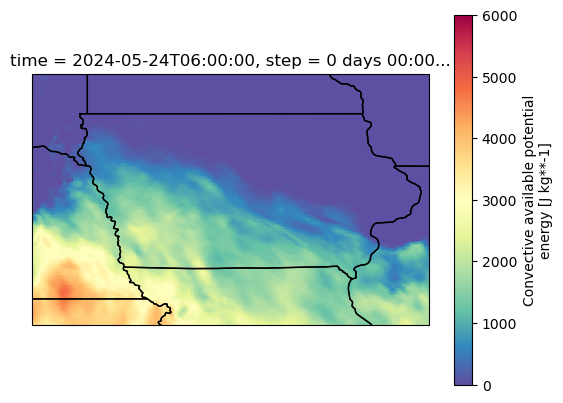

In [ ]:
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))
CAPE["cape"].isel(step=2, pressureFromGroundLayer=0).plot(
    ax=ax, y='latitude', x='longitude', vmin=0, vmax=6000, cmap='Spectral_r')
ax.coastlines()
ax.add_feature(cfeature.STATES)
ax.set_extent([-97.5, -90.0, 39.5, 44.25])